In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.text import Tokenizer


In [42]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AML Group/clean_data3.csv')

# Remove columns not needed for RNN analysis
#data = data.drop(['molecule_chembl_id', 'canonical_smiles'], axis=1)

In [43]:
#Drop unnamed, moleculed_id, canonical smiles
columns_to_drop = ['Unnamed: 0','molecule_chembl_id','smiles','standard_units']
data = data.drop(columns_to_drop, axis=1)

#Encode standard type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['standard_type_encoded'] = label_encoder.fit_transform(data['standard_type'])
data['bioactivity_encoded'] = label_encoder.fit_transform(data['bioactivity_class'])
columns_to_drop = ['standard_type','bioactivity_class']
data = data.drop(columns_to_drop, axis=1)


# Extract input features (X) and target variable (y)
X = data.drop('bioactivity_encoded', axis=1)  # Drop the target variable column from input features
y = data['bioactivity_encoded']  # Extract the target variable column

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# Standardize the input features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
##X_val = scaler.transform(X_val)
#X_test = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3778, 9)
(3778,)
(1181, 9)
(1181,)


In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
from keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='linear', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='mse',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, 
                    epochs=10, batch_size=8, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test),
                    callbacks=[early_stop])



/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
473/473 [==============================] - 20s 17ms/step - loss: 0.2904 - accuracy: 0.7570 - val_loss: 0.2004 - val_accuracy: 0.8781
Epoch 2/10
473/473 [==============================] - 8s 16ms/step - loss: 0.2063 - accuracy: 0.8912 - val_loss: 0.1718 - val_accuracy: 0.9170
Epoch 3/10
473/473 [==============================] - 6s 13ms/step - loss: 0.1849 - accuracy: 0.9079 - val_loss: 0.1620 - val_accuracy: 0.9162
Epoch 4/10
473/473 [==============================] - 8s 18ms/step - loss: 0.1720 - accuracy: 0.9108 - val_loss: 0.1500 - val_accuracy: 0.9204
Epoch 5/10
473/473 [==============================] - 6s 13ms/step - loss: 0.1583 - accuracy: 0.9124 - val_loss: 0.1401 - val_accuracy: 0.9263
Epoch 6/10
473/473 [==============================] - 9s 18ms/step - loss: 0.1471 - accuracy: 0.9179 - val_loss: 0.1399 - val_accuracy: 0.9094
Epoch 7/10
473/473 [==============================] - 6s 13ms/step - loss: 0.1356 - accuracy: 0.9179 - val_loss: 0.1221 - val_accuracy: 0.924

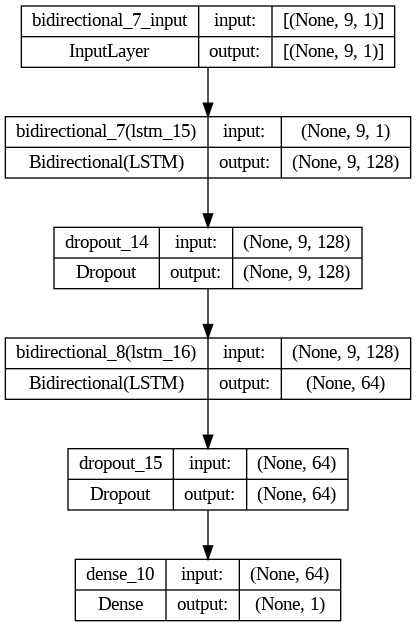

In [46]:
from IPython.display import Image
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)
Image('model.png')

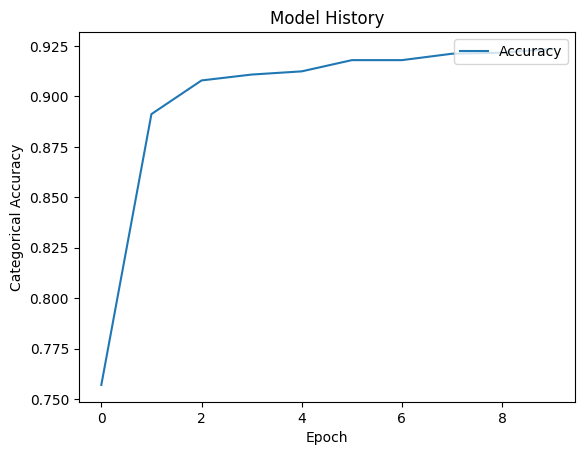

In [47]:
from matplotlib import pyplot as plt
#history = model.fit(X_train, y_train, epochs=10, batch_size=32)
plt.plot(history.history['accuracy'])
plt.title('Model History')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='upper right')
plt.show()

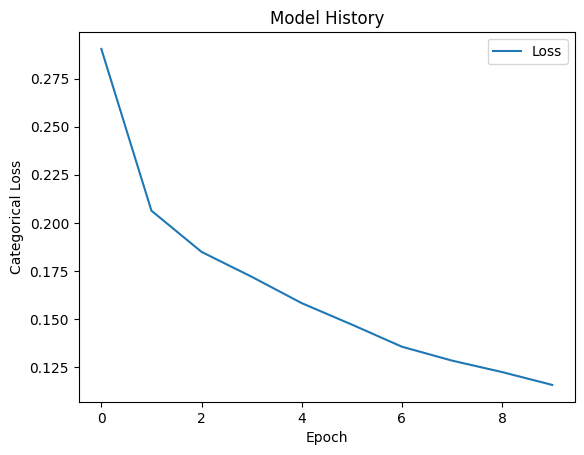

In [49]:
from matplotlib import pyplot as plt
#history = model.fit(X_train, y_train, epochs=10, batch_size=32)
plt.plot(history.history['loss'])
plt.title('Model History')
plt.ylabel('Categorical Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper right')
plt.show()